In [15]:
%matplotlib inline

In [16]:
import pandas as pd
import numpy as np
import shap


In [17]:
from explainerdashboard import ClassifierExplainer, RegressionExplainer

In [18]:
corr_df = pd.read_csv('Databases/corr_database_v1.csv')

In [19]:
corr_df.head()

,BPPD,BAPD,BFPD,BSW,Caudal_gas_MSCFD,Presion_cabeza_psi,Temperatura_cabeza_F,Salinidad_ppm,CO2_frac,Pp_CO2_psi,velocidad_liquido_m/s,bicarbonatos_ppm,dosis_IC_ppm,Fe_ppm,mpy
0,273.00,5187.00,5460.0,95,120.0,160,220,76600,0.07,11.2,2.058165,240,50,45.90,8.41626
1,306.90,251.10,558.0,45,33.0,180,130,74000,0.00,0.0,0.300501,281,50,77.11,0.10024
2,30.00,970.00,1000.0,97,51.0,200,192,73000,0.15,30.0,0.613607,120,90,54.00,7.17844
3,311.64,324.36,636.0,51,28.0,210,160,36200,0.15,31.5,0.324479,220,40,56.21,1.50500
4,412.48,4743.52,5156.0,92,48.0,200,150,82200,0.20,40.0,1.655785,400,40,54.80,0.71894


In [20]:
corr_df.describe()

,BPPD,BAPD,BFPD,BSW,Caudal_gas_MSCFD,Presion_cabeza_psi,Temperatura_cabeza_F,Salinidad_ppm,CO2_frac,Pp_CO2_psi,velocidad_liquido_m/s,bicarbonatos_ppm,dosis_IC_ppm,Fe_ppm,mpy
count,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000,77.000000
mean,381.881805,1802.848325,2184.730130,73.051948,127.924156,165.857143,182.012987,42309.909091,0.106883,17.823766,1.530058,446.636364,59.623377,34.273961,2.493065
std,345.066978,1520.476985,1553.042891,24.061815,124.992756,58.820359,35.367802,22067.353688,0.092740,17.734903,0.938551,310.737447,30.693750,18.754529,3.556521
min,30.000000,37.240000,266.000000,10.000000,10.500000,78.000000,80.000000,5000.000000,0.000000,0.000000,0.220364,100.000000,15.000000,3.600000,0.100240
25%,185.470000,439.280000,820.000000,57.000000,40.000000,130.000000,160.000000,25000.000000,0.050000,5.100000,0.711080,220.000000,40.000000,19.000000,0.676190
50%,286.830000,1537.900000,1968.000000,83.000000,66.000000,160.000000,192.000000,43000.000000,0.070000,11.200000,1.347109,300.000000,50.000000,37.500000,1.618040
75%,403.000000,2830.100000,3176.000000,91.000000,206.000000,195.000000,210.000000,60000.000000,0.150000,26.250000,2.095110,710.000000,70.000000,48.900000,2.716030
max,1883.250000,6666.480000,7092.000000,97.000000,561.000000,400.000000,220.000000,82200.000000,0.400000,105.000000,4.681082,1290.000000,200.000000,77.110000,23.082550


In [21]:
from pycaret.regression import *

In [22]:
exp_clf01 = setup(data = corr_df, target = 'mpy', session_id = 123, numeric_features=['dosis_IC_ppm'])

,Description,Value
0,session_id,123
1,Target,mpy
2,Original Data,"(77, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(53, 14)"


Shape of your Data Set loaded: (77, 15)
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
#######################################################################################
Classifying variables in data set...
    14 Predictors classified...
        No variables removed since no ID or low-information variables found in data set

################ Regression problem #####################


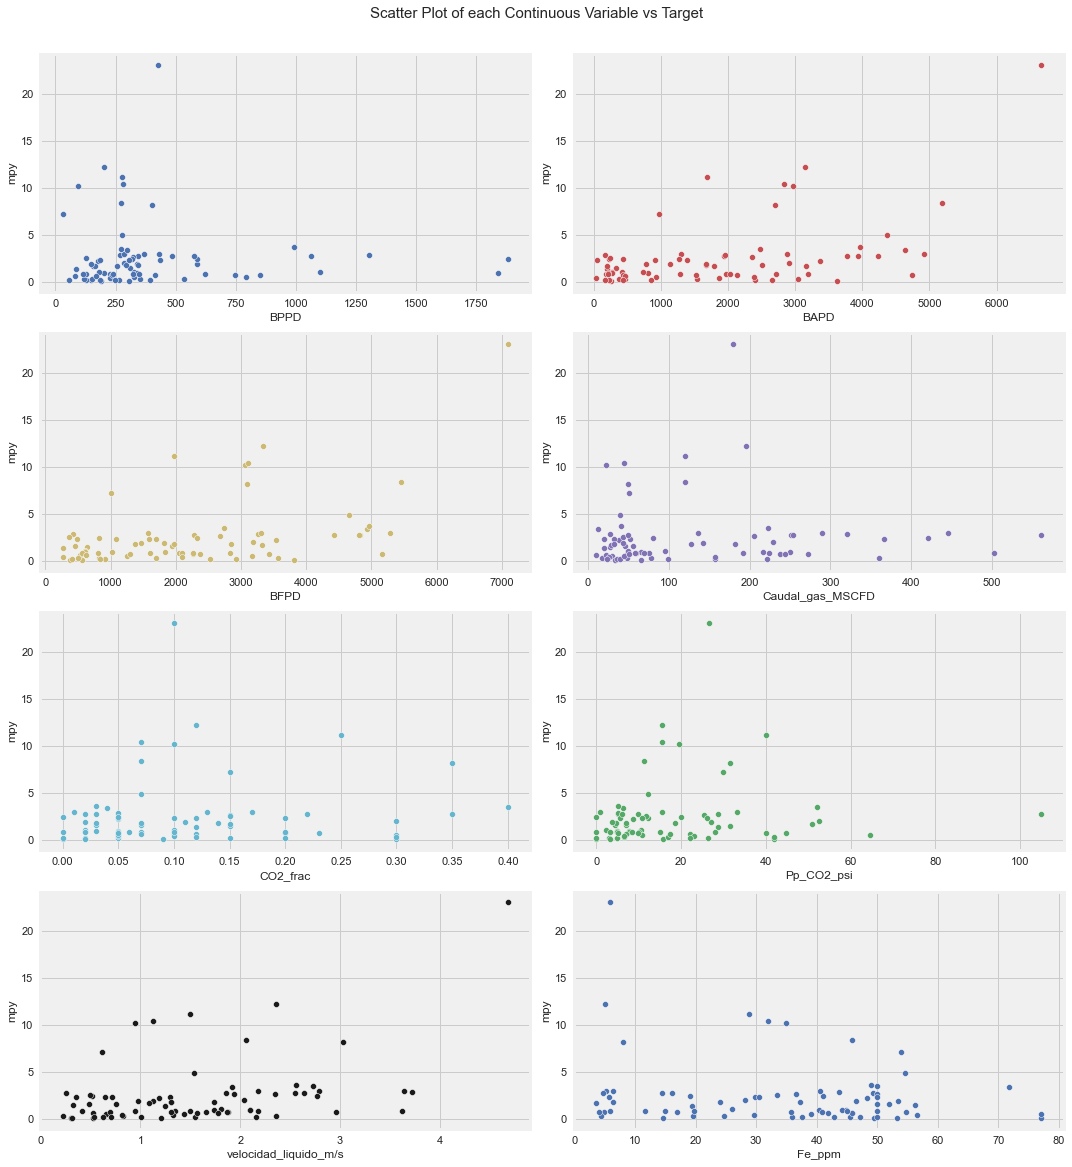

Number of All Scatter Plots = 36


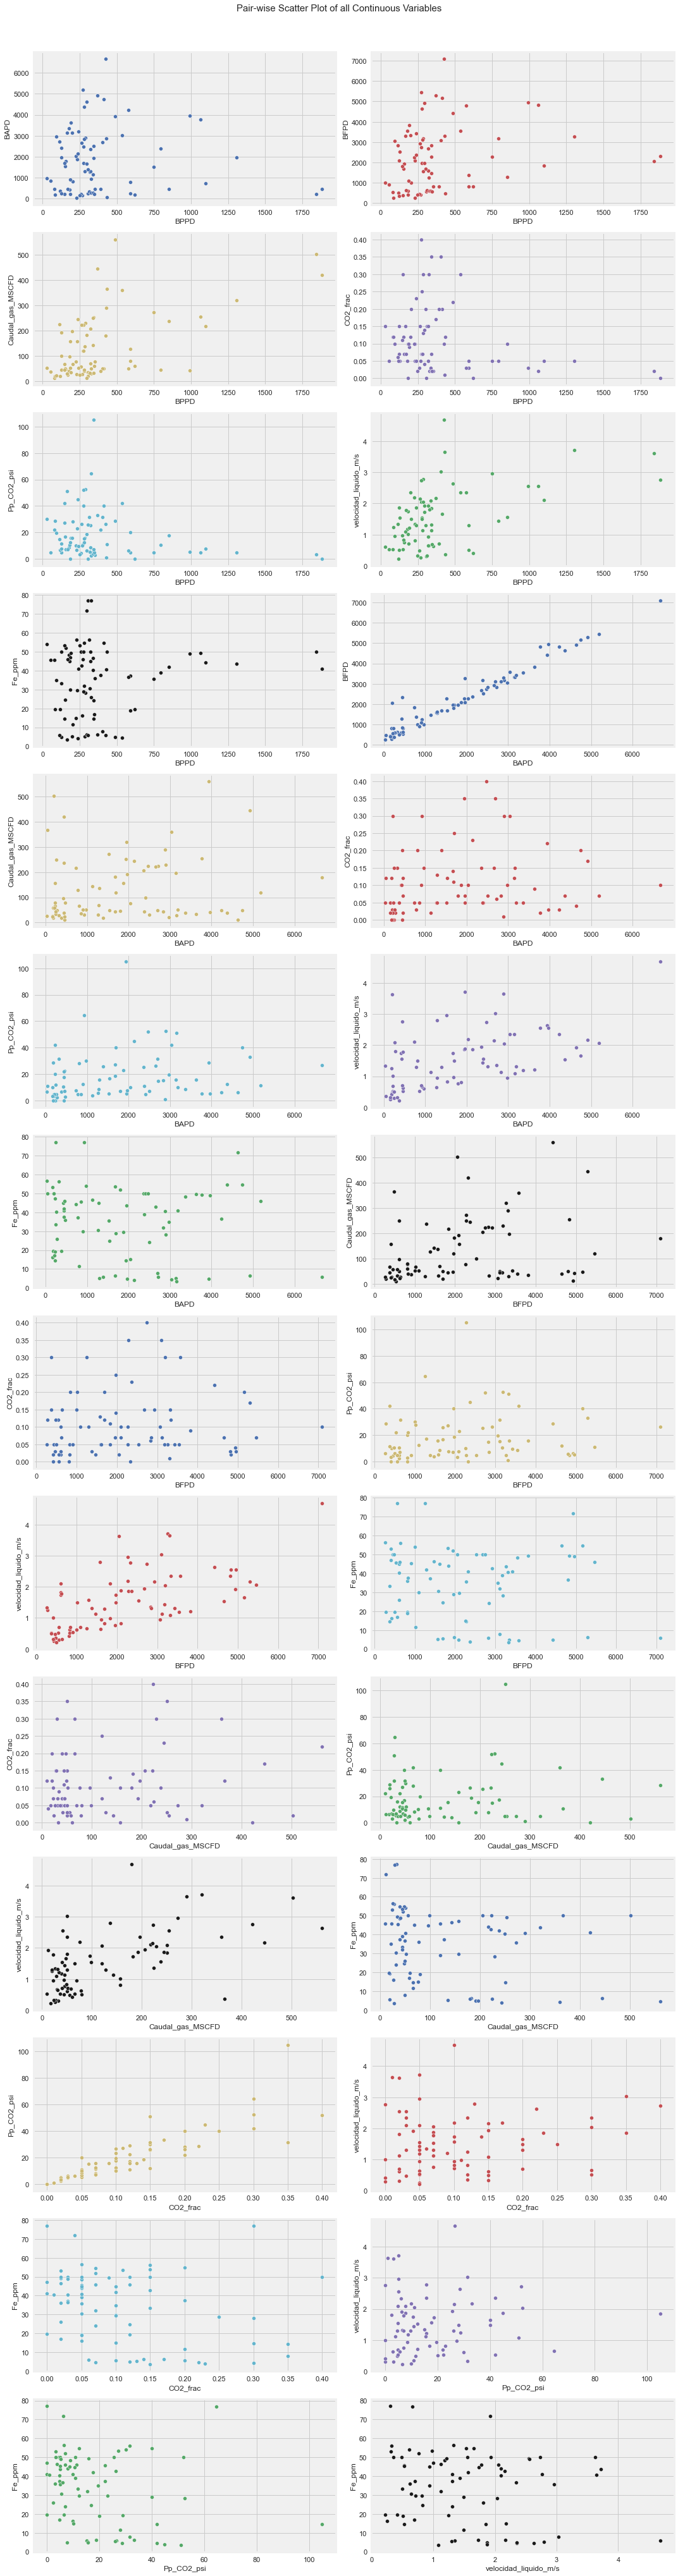

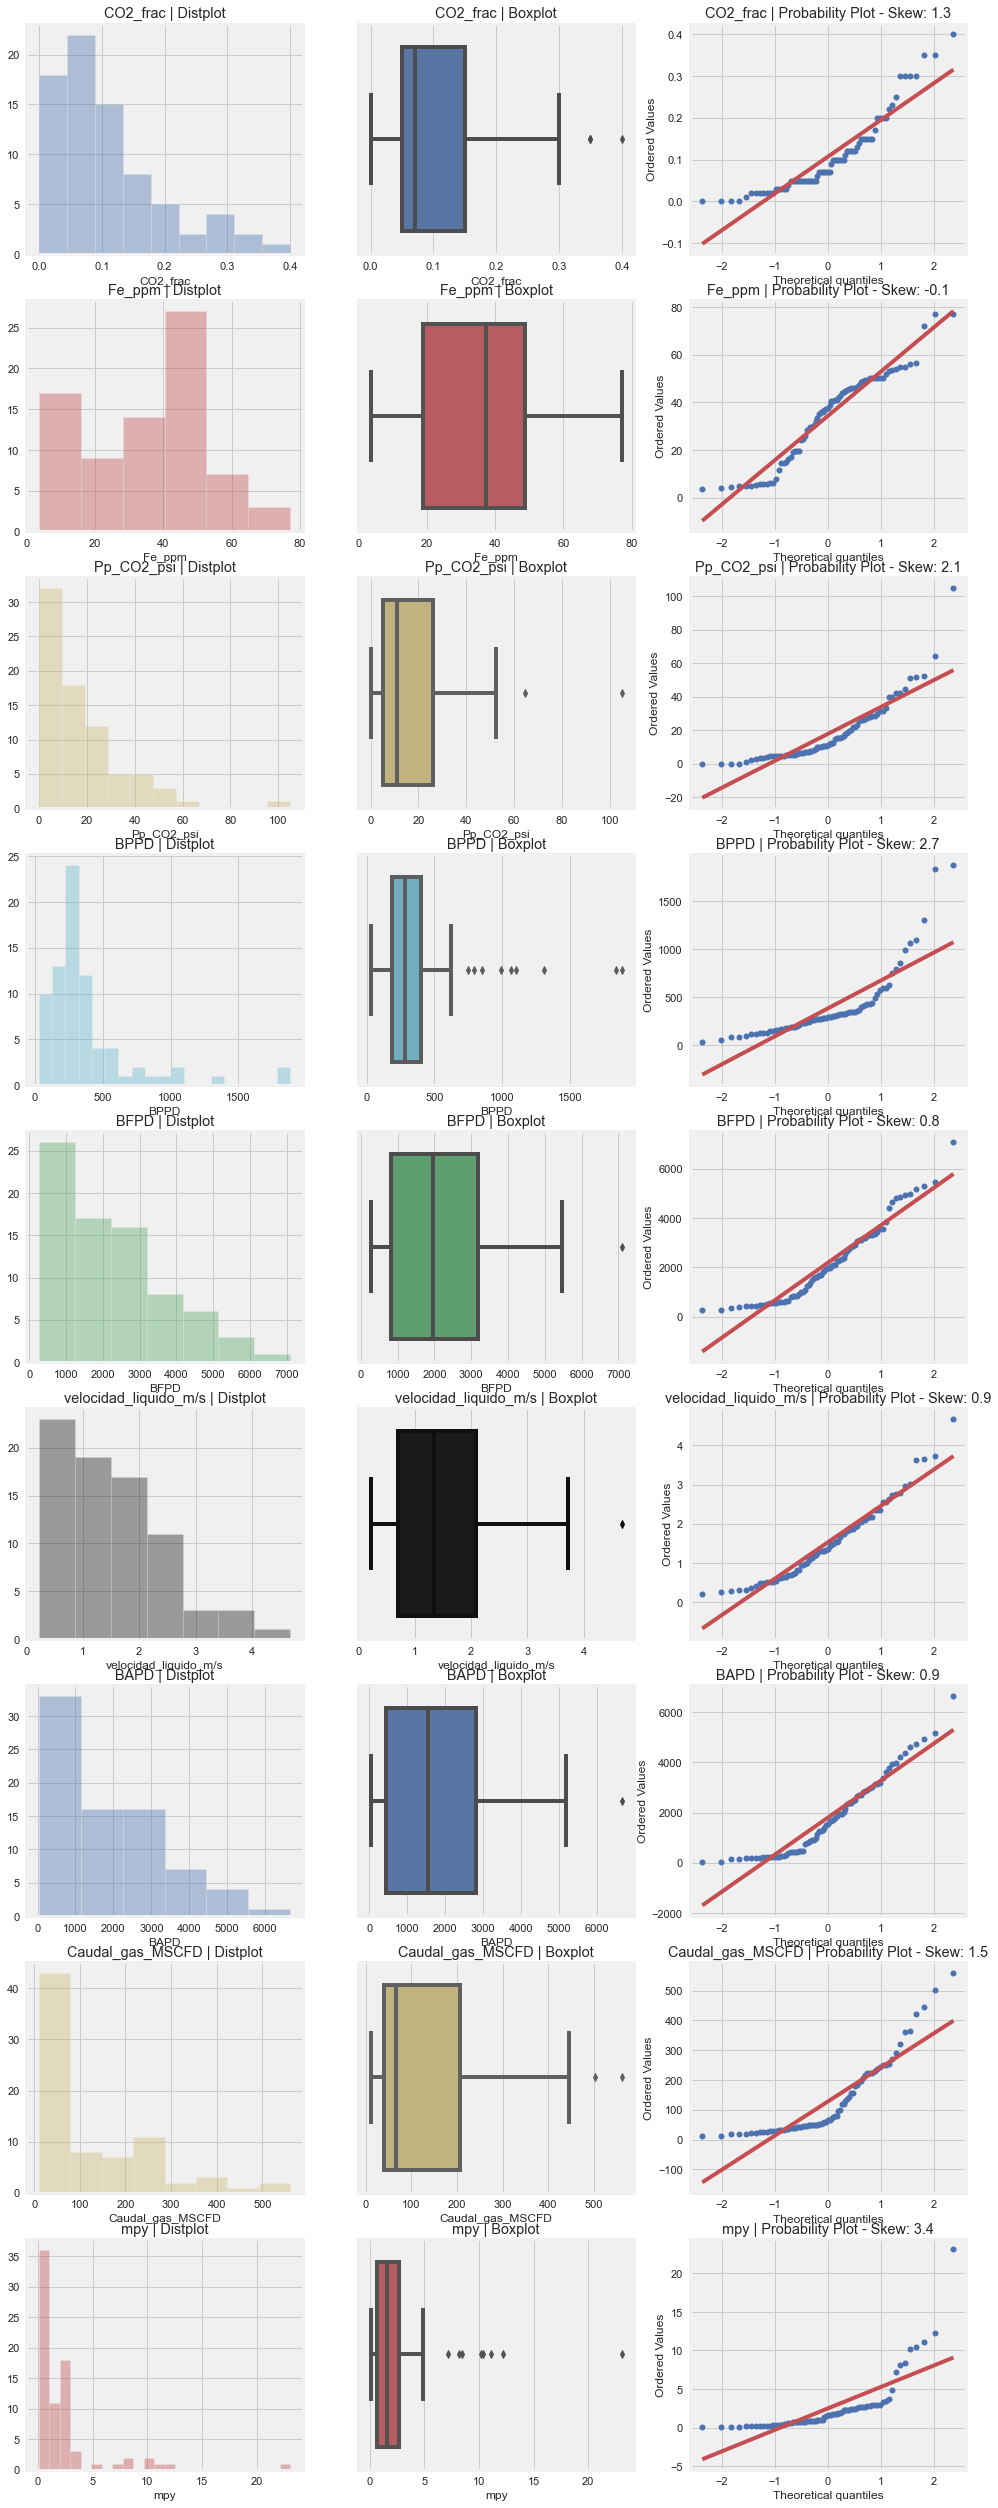

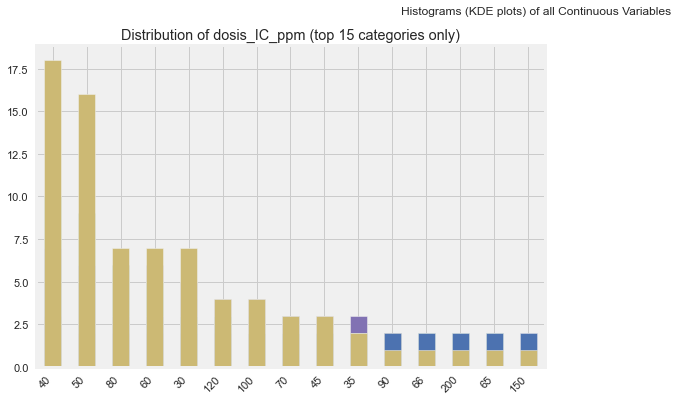

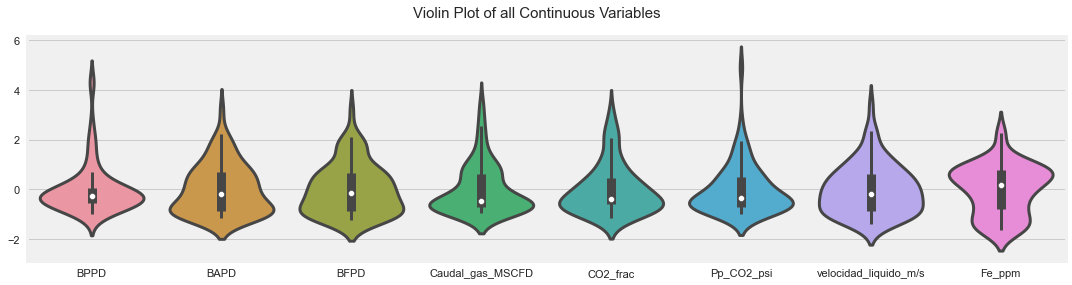

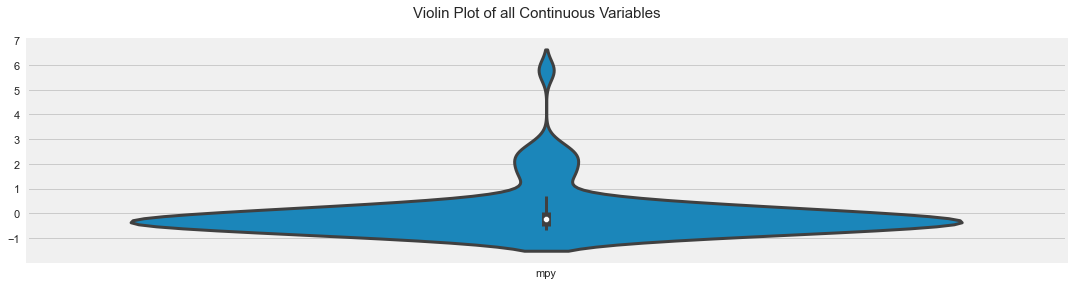

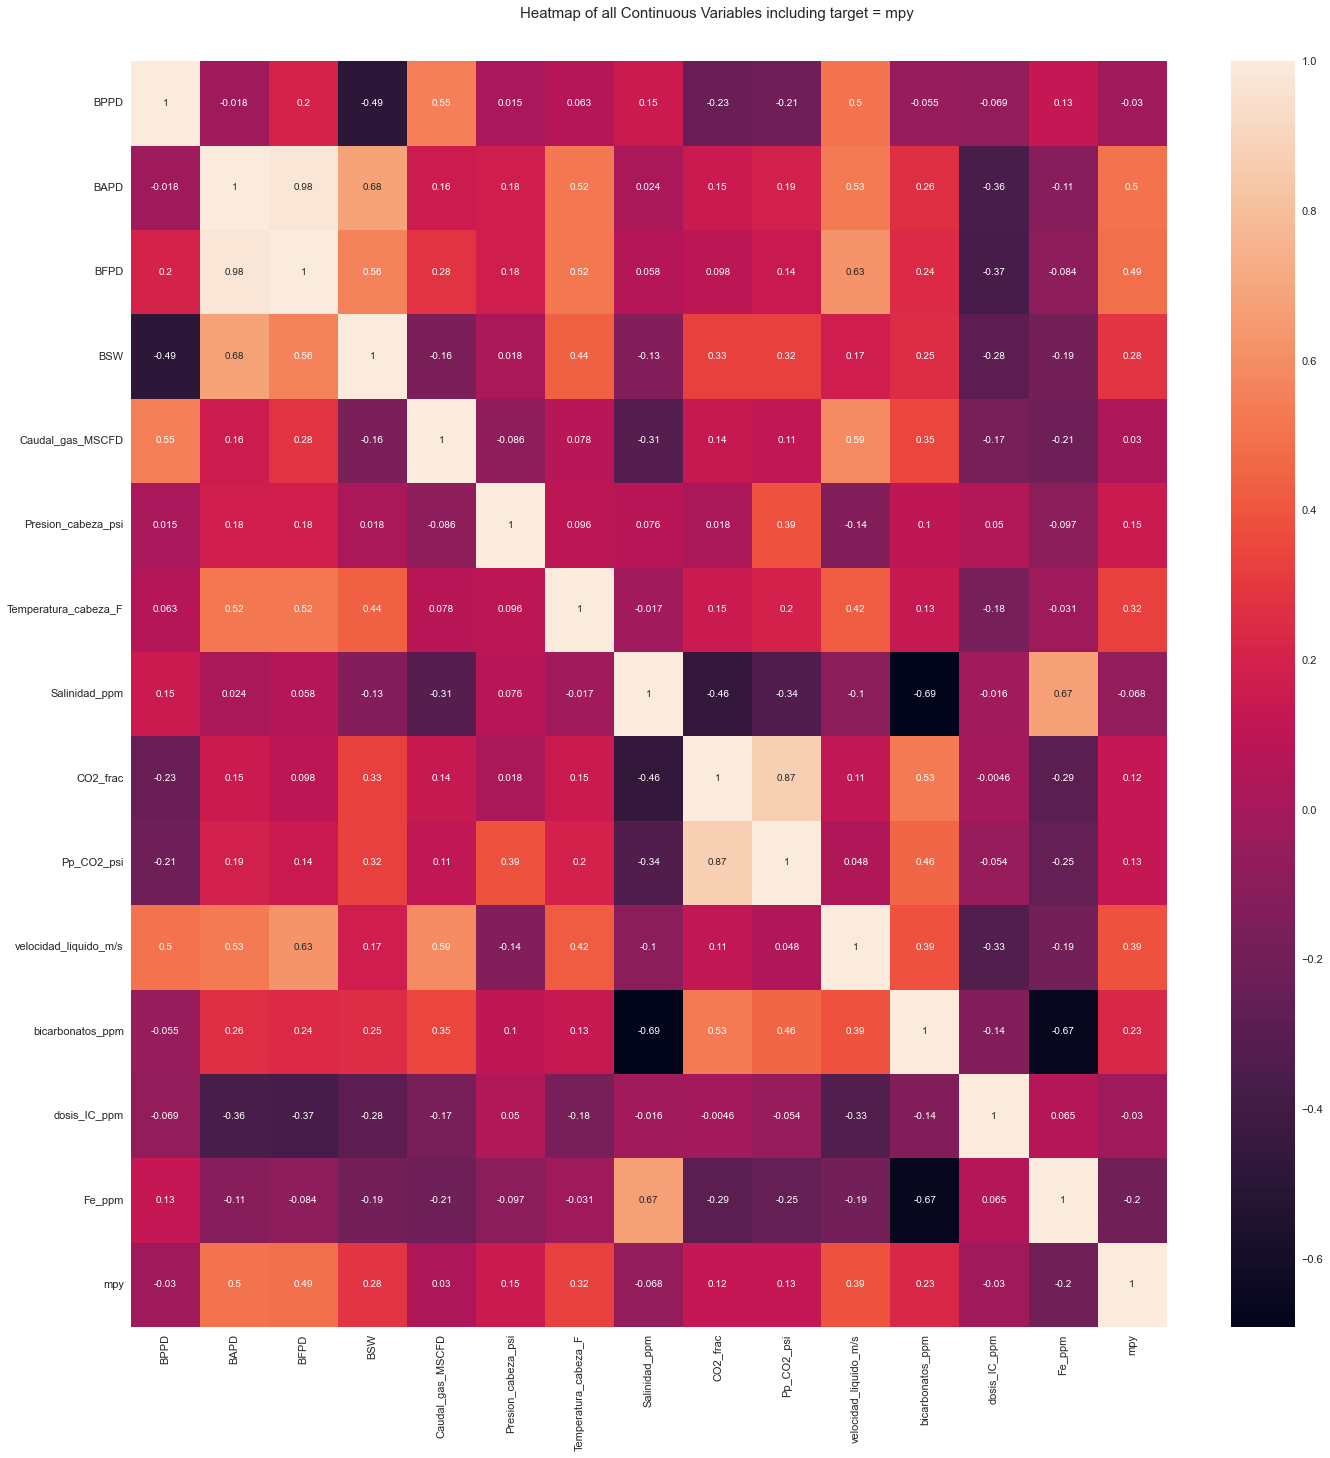

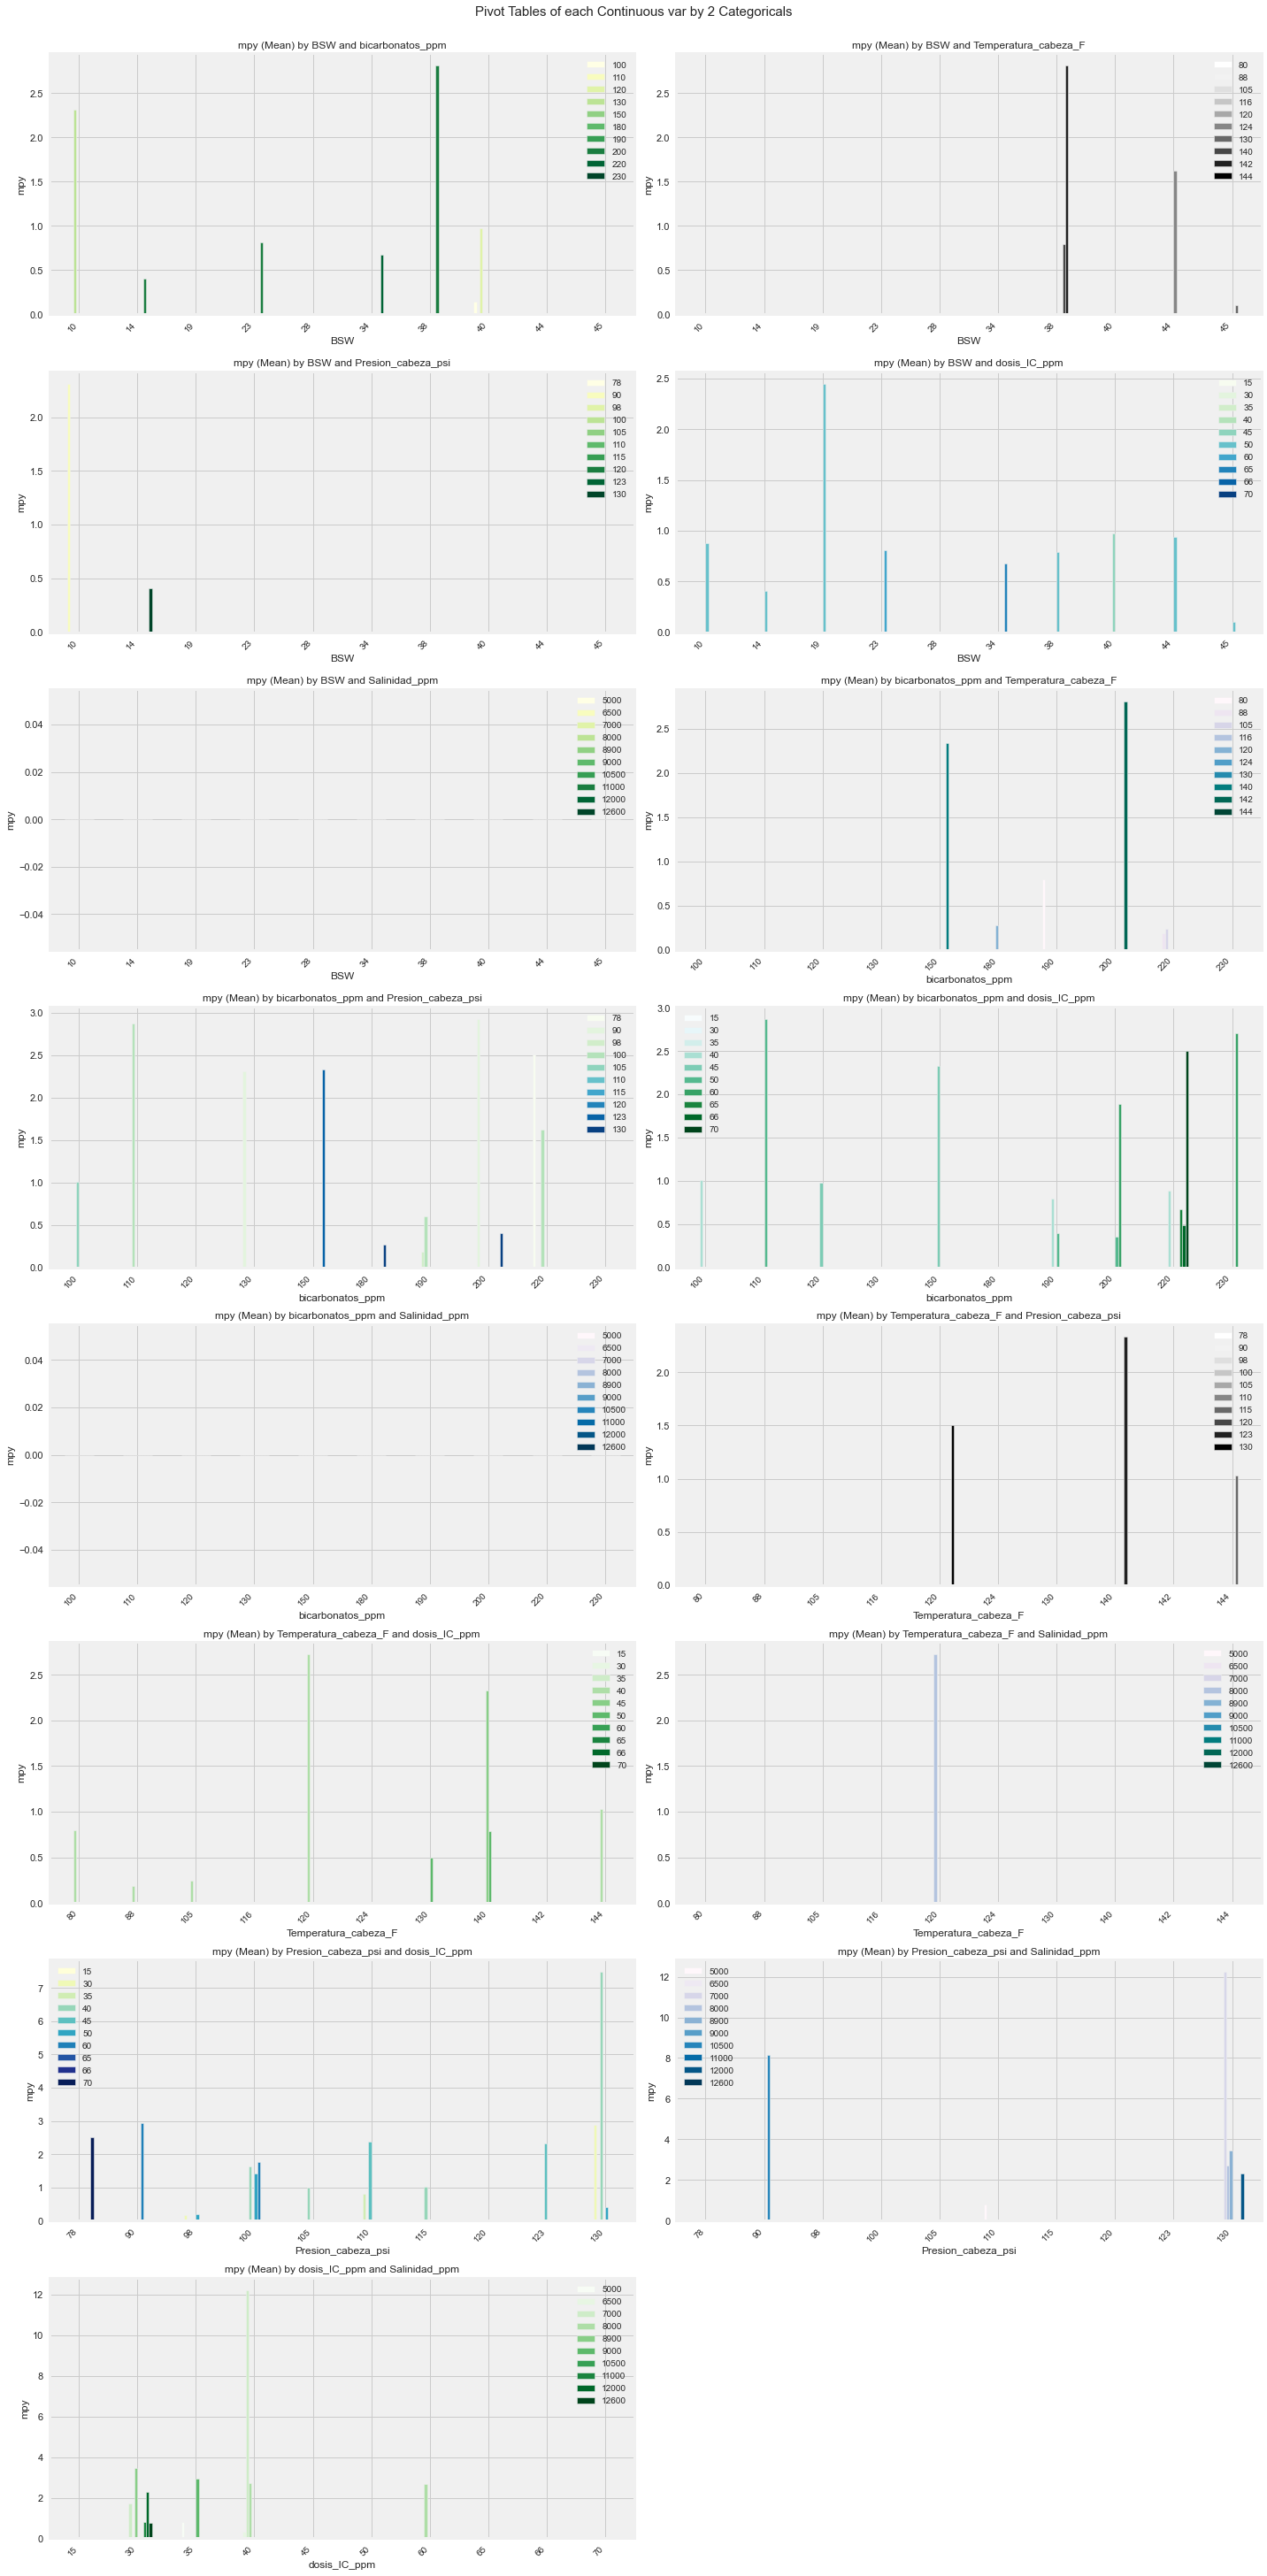

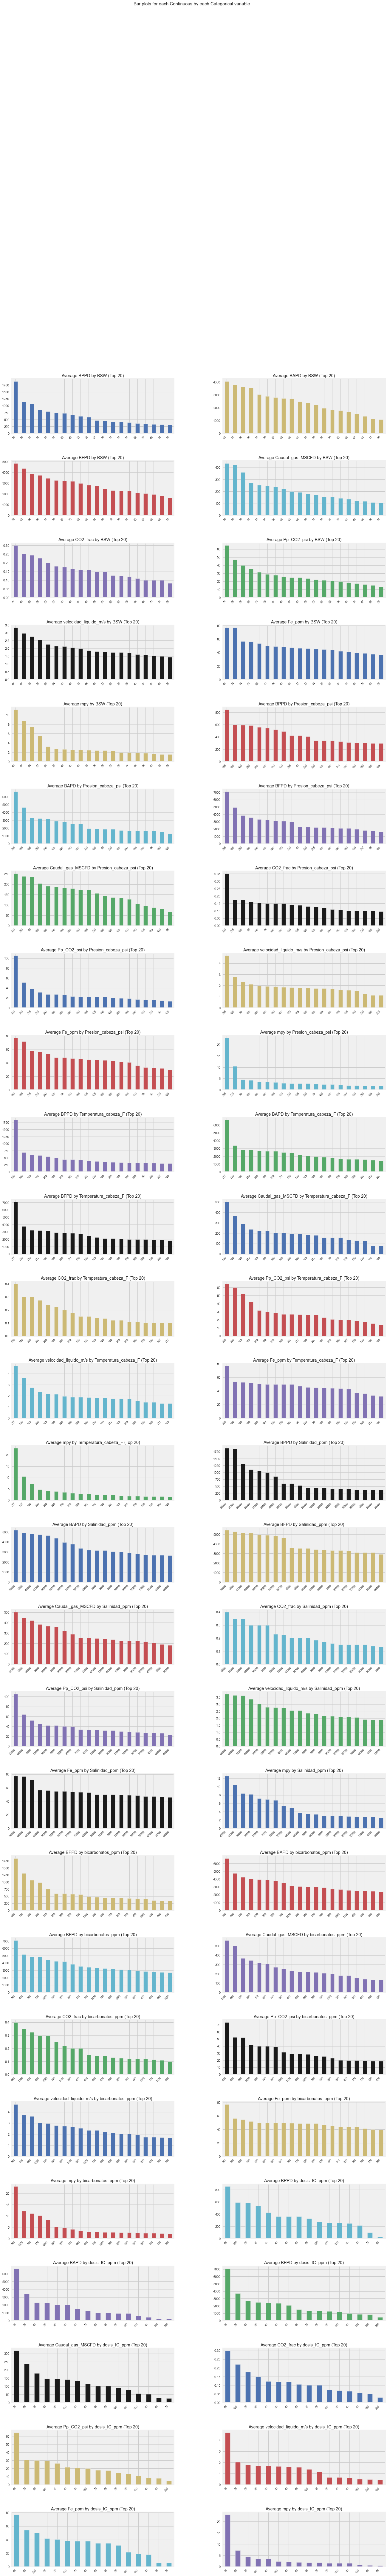

All Plots done
Time to run AutoViz = 60 seconds 

 ###################### AUTO VISUALIZATION Completed ########################


In [23]:
eda(display_format = 'svg')

In [24]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
huber,Huber Regressor,1.8888,12.5286,2.7786,-1.8124,0.6214,2.3793,0.0550
ada,AdaBoost Regressor,1.8664,14.0941,2.8222,-2.4704,0.6456,2.3404,0.0720
rf,Random Forest Regressor,1.9836,13.2986,2.8340,-3.3413,0.6779,3.2457,0.1510
omp,Orthogonal Matching Pursuit,2.0928,12.6878,3.0114,-4.2653,0.6812,3.0722,0.0170
gbr,Gradient Boosting Regressor,2.0809,13.3441,2.9203,-4.3246,0.7089,3.4277,0.0300
br,Bayesian Ridge,2.1452,13.1375,3.0748,-4.4131,0.6933,3.1172,0.0260
et,Extra Trees Regressor,2.1059,13.1868,3.0519,-6.3417,0.7331,3.5554,0.1130
lightgbm,Light Gradient Boosting Machine,2.3206,14.5154,3.1623,-6.8904,0.7130,3.3942,0.0340
par,Passive Aggressive Regressor,2.2658,16.1813,3.1606,-7.0237,0.7580,2.9291,0.0140
knn,K Neighbors Regressor,2.0237,16.0341,3.0915,-7.0606,0.6920,2.6665,0.0180


In [25]:
exp_clf102 = setup(data = corr_df, target = 'mpy',session_id=123, numeric_features=['dosis_IC_ppm'],normalize = True, remove_outliers=True)

,Description,Value
0,session_id,123
1,Target,mpy
2,Original Data,"(77, 15)"
3,Missing Values,False
4,Numeric Features,14
5,Categorical Features,0
6,Ordinal Features,False
7,High Cardinality Features,False
8,High Cardinality Method,None
9,Transformed Train Set,"(50, 14)"


In [26]:
best = compare_models()

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
ada,AdaBoost Regressor,1.5370,6.3555,2.0192,-1.6320,0.6062,2.3588,0.0440
huber,Huber Regressor,1.7241,6.7767,2.2727,-2.0335,0.6569,2.7322,0.0150
omp,Orthogonal Matching Pursuit,1.8023,7.4632,2.3771,-2.8459,0.6750,3.0770,0.0250
br,Bayesian Ridge,1.6229,6.4599,2.2497,-2.9176,0.6575,3.1713,0.0150
rf,Random Forest Regressor,1.6805,6.6268,2.1902,-3.2205,0.6726,3.3623,0.1080
lightgbm,Light Gradient Boosting Machine,1.7854,7.1858,2.3833,-3.3219,0.6852,3.0947,0.0180
en,Elastic Net,1.6702,6.7449,2.2433,-3.7048,0.6709,3.1390,0.0140
gbr,Gradient Boosting Regressor,1.8693,7.3826,2.4187,-4.1493,0.7050,3.2811,0.0300
knn,K Neighbors Regressor,1.8378,7.4590,2.4303,-4.1674,0.7067,3.4366,0.0160
et,Extra Trees Regressor,1.8763,7.4998,2.4635,-4.6028,0.7241,3.5717,0.1150


In [27]:
ada_model = create_model('ada')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.1842,36.8273,6.0685,-0.7362,1.1180,1.3406
1,1.1370,1.5373,1.2399,-0.9945,0.5313,2.1924
2,1.4692,2.6157,1.6173,-1.7947,0.7129,3.6312
3,1.8551,8.0078,2.8298,0.0714,0.6213,1.3092
4,1.6839,8.2767,2.8769,0.0582,0.5858,0.7846
5,0.9724,1.1575,1.0759,-0.8951,0.5471,3.7838
6,1.2200,1.8102,1.3454,-0.1145,0.5633,3.4042
7,1.0883,1.4560,1.2067,0.7248,0.3361,0.5912
8,0.8582,0.9479,0.9736,-1.9746,0.4920,2.2578


In [28]:
tuned_model=tune_model(ada_model,n_iter = 10,choose_better = True)

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,4.1118,35.9418,5.9951,-0.6945,1.0813,1.3070
1,1.3575,2.0803,1.4423,-1.6990,0.6119,2.4746
2,1.3762,2.3394,1.5295,-1.4995,0.6916,3.1142
3,1.8996,8.9970,2.9995,-0.0433,0.6234,0.9516
4,1.4489,8.4341,2.9042,0.0403,0.5655,0.4132
5,0.6893,0.6877,0.8293,-0.1259,0.4271,2.3370
6,1.2845,1.9764,1.4058,-0.2168,0.5895,3.4072
7,1.0754,1.5927,1.2620,0.6990,0.3259,0.5985
8,0.7073,0.6406,0.8004,-1.0103,0.4197,1.7978


In [29]:
evaluate_model(tuned_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [30]:
dashboard(tuned_model)

Generating self.shap_explainer = shap.KernelExplainer(model, X)...
Building ExplainerDashboard..
Detected notebook environment, consider setting mode='external', mode='inline' or mode='jupyterlab' to keep the notebook interactive while the dashboard is running...
For this type of model and model_output interactions don't work, so setting shap_interaction=False...
The explainer object has no decision_trees property. so setting decision_trees=False...
Generating layout...
Calculating shap values...


  0%|          | 0/24 [00:00<?, ?it/s]

Calculating predictions...
Calculating residuals...
Calculating absolute residuals...
Calculating dependencies...
Calculating importances...
Reminder: you can store the explainer (including calculated dependencies) with explainer.dump('explainer.joblib') and reload with e.g. ClassifierExplainer.from_file('explainer.joblib')
Registering callbacks...
Starting ExplainerDashboard on http://10.206.30.201:8050
Dash is running on http://0.0.0.0:8050/

 * Serving Flask app 'explainerdashboard.dashboards' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on all addresses.
 * Running on http://10.206.30.201:8050/ (Press CTRL+C to quit)
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET / HTTP/1.1" 200 -
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET /assets/bootstrap.min.css?m=1653075665.174864 HTTP/1.1" 200 -
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET /_dash-component-suites/dash/deps/polyfill@7.v2_4_1m1653075663.12.1.min.js HTTP/1.1" 200 -
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET /_dash-component-suites/dash/deps/react@16.v2_4_1m1653075663.14.0.min.js HTTP/1.1" 200 -
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET /_dash-component-suites/dash/deps/react-dom@16.v2_4_1m1653075663.14.0.min.js HTTP/1.1" 200 -
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET /_dash-component-suites/dash/deps/prop-types@15.v2_4_1m1653075663.8.1.min.js HTTP/1.1" 200 -
10.206.30.201 - - [12/Sep/2022 13:44:51] "GET /_dash-component-suites/dash_bootstrap_components/_components/dash_bootstrap_components.v0_13_1m1653075664.min.js HTTP/1.1" 200 -
10.206.30

In [33]:
import deepchecks

In [35]:
deep_check(tuned_model)

Full Suite:   0%|          | 0/36 [00:00<?, ? Check/s]

Calculating permutation feature importance. Expected to finish in 2 seconds


In [36]:
predict_model(tuned_model)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,AdaBoost Regressor,1.9859,10.7934,3.2853,-0.3236,0.6564,1.2778


,BPPD,BAPD,BFPD,BSW,Caudal_gas_MSCFD,Presion_cabeza_psi,Temperatura_cabeza_F,Salinidad_ppm,CO2_frac,Pp_CO2_psi,velocidad_liquido_m/s,bicarbonatos_ppm,dosis_IC_ppm,Fe_ppm,mpy,Label
0,-0.389840,0.296706,0.212374,0.772366,-0.372258,-1.233341,-0.043085,-0.388329,-0.099685,-0.438484,0.772595,0.347638,-0.360922,-1.122963,0.80521,1.146904
1,-0.586969,1.048568,0.909252,0.988727,-0.769322,3.473560,0.886247,-1.694124,0.428646,1.764783,-0.388307,2.202917,-1.008262,-1.760997,1.69926,1.597086
2,0.760682,1.772433,1.888776,0.685822,-0.588922,0.727868,1.151770,0.820741,-0.839348,-0.653436,0.943350,-0.643976,-0.037253,0.085942,2.71055,2.073453
3,0.220756,2.115484,2.116419,0.858910,-0.605556,0.727868,-0.706893,1.942758,0.956977,1.173663,0.215278,-0.100187,-0.684592,1.104557,0.71894,2.414851
4,0.293590,-1.038299,-0.958081,-2.689402,2.039318,-1.429462,-0.388265,-1.258859,0.111647,-0.395493,-1.163005,-0.963852,1.257427,0.835912,2.31148,0.969459
5,-0.632727,-0.037733,-0.163961,0.815638,-0.597239,-0.448858,0.886247,-0.001426,0.111647,-0.073064,-0.665553,-0.739939,-0.360922,-0.580075,0.29920,1.121263
6,-0.202019,-0.203241,-0.239623,0.426189,0.126359,-0.841100,0.833142,-1.408784,0.217313,-0.137550,1.415435,1.307265,1.904766,-1.671449,2.93174,8.132837
7,-0.354439,0.361996,0.283430,0.772366,1.024618,0.629807,0.886247,-1.423293,1.273975,1.434293,0.439023,1.147327,-1.008262,-1.738610,0.74967,1.687486
8,-0.216770,1.865262,1.783507,0.945454,-0.672094,0.237565,1.151770,1.086737,-0.416684,-0.317573,0.083989,-0.388076,-0.684592,1.096722,4.92600,1.788603
9,-0.344736,1.070667,0.979519,0.902182,-0.583099,0.629807,0.886247,0.520892,-0.628016,-0.451918,-0.154633,-0.228138,0.610087,0.326604,0.76563,1.301669


In [38]:
save_model(tuned_model, model_name = 'corrosion_regressor')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=True, features_todrop=[],
                                       id_columns=[], ml_usecase='regression',
                                       numerical_features=['dosis_IC_ppm'],
                                       target='mpy', time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeri...
                 ('dummy', Dummify(target='mpy')),
                 ('fix_perfect', Remove_100(target='mpy')),
                 ('clean_names', Clean_Colum_Names()),
                 ('feature_select', 'passthrough'), ('fix_multi', 'passthrough'),
                 ('dfs', 'passthrough'), ('pca', 'passthrough'),
